/tmp/ipykernel_54570/1350987230.py:31: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = cm.get_cmap("Set2")(np.linspace(0, 1, len(levels)))


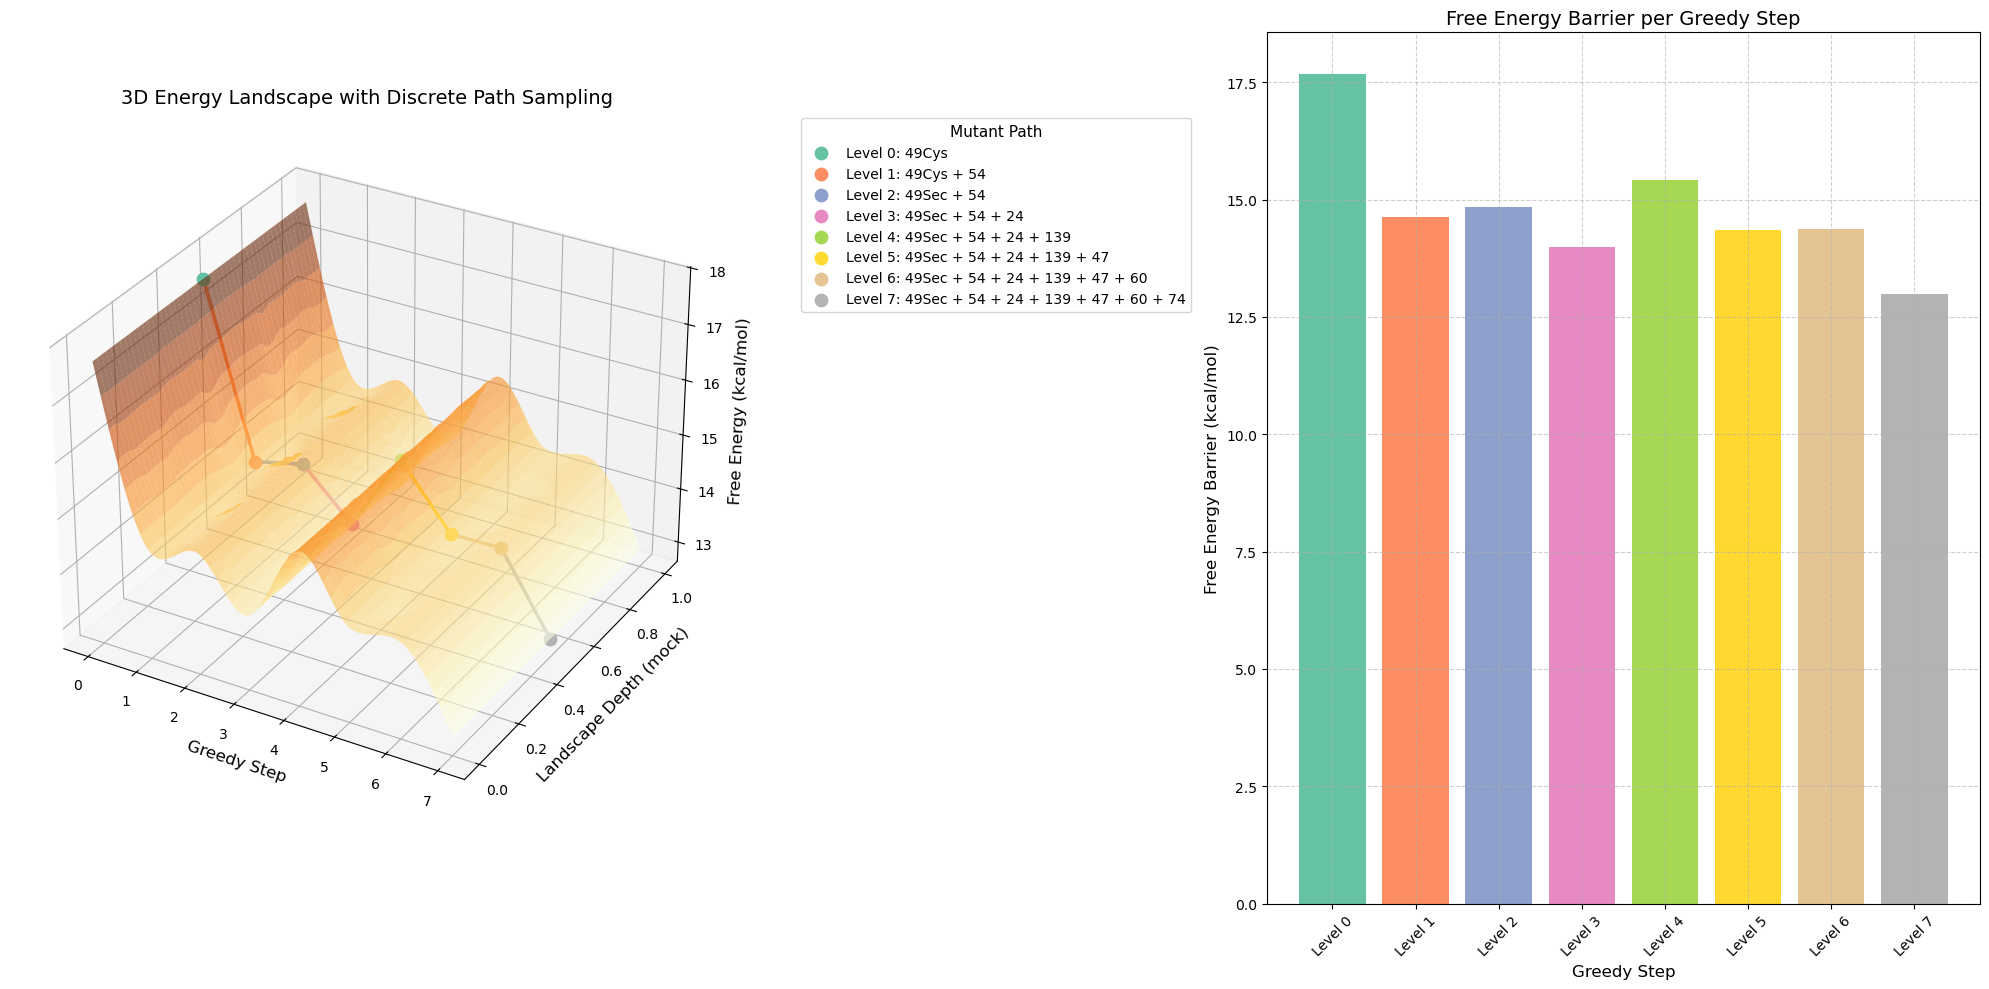

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.interpolate import griddata
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Data
levels = np.array([0, 1, 2, 3, 4, 5, 6, 7])
barriers = np.array([17.68, 14.62, 14.84, 13.99, 15.42, 14.35, 14.37, 12.98])
mutations = [
    "49Cys",
    "49Cys + 54",
    "49Sec + 54",
    "49Sec + 54 + 24",
    "49Sec + 54 + 24 + 139",
    "49Sec + 54 + 24 + 139 + 47",
    "49Sec + 54 + 24 + 139 + 47 + 60",
    "49Sec + 54 + 24 + 139 + 47 + 60 + 74"
]

# Surface mock data
y = np.linspace(0, 1, len(levels))
X, Y = np.meshgrid(levels, y)
Z = np.tile(barriers, (len(y), 1))
xi = np.linspace(0, 7, 200)
yi = np.linspace(0, 1, 200)
xi_grid, yi_grid = np.meshgrid(xi, yi)
zi_grid = griddata((X.flatten(), Y.flatten()), Z.flatten(), (xi_grid, yi_grid), method='cubic')

# Softer pastel-like color palette for path
colors = cm.get_cmap("Set2")(np.linspace(0, 1, len(levels)))

# Create combined plot
fig = plt.figure(figsize=(20, 10))

# --- 3D Surface with Discrete Path Sampling ---
ax1 = fig.add_subplot(121, projection='3d')
surf = ax1.plot_surface(xi_grid, yi_grid, zi_grid, cmap='YlOrBr', alpha=0.6, edgecolor='none')

# Greedy path with sampled steps
for i in range(len(levels)):
    ax1.scatter(levels[i], 0.5, barriers[i], color=colors[i], s=80, label=f"Level {i}: {mutations[i]}")
    if i > 0:
        ax1.plot([levels[i - 1], levels[i]], [0.5, 0.5], [barriers[i - 1], barriers[i]], color=colors[i], linewidth=2.5)

ax1.set_xlabel("Greedy Step", fontsize=12)
ax1.set_ylabel("Landscape Depth (mock)", fontsize=12)
ax1.set_zlabel("Free Energy (kcal/mol)", fontsize=12)
ax1.set_title("3D Energy Landscape with Discrete Path Sampling", fontsize=14)
ax1.view_init(elev=30, azim=-60)
ax1.legend(loc='upper left', bbox_to_anchor=(1.1, 1), fontsize=10, title="Mutant Path", title_fontsize=11)

# --- Bar Plot ---
ax2 = fig.add_subplot(122)
ax2.bar(levels, barriers, color=colors, tick_label=[f"L{i}" for i in levels])
ax2.set_title("Free Energy Barrier per Greedy Step", fontsize=14)
ax2.set_xlabel("Greedy Step", fontsize=12)
ax2.set_ylabel("Free Energy Barrier (kcal/mol)", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.6)
ax2.set_xticks(levels)
ax2.set_xticklabels([f"Level {i}" for i in levels], rotation=45)

plt.tight_layout()
plt.show()
